### Models for Classification Problems - Summary
In this exercise, I would compare and summarize the following models for a Classification Problem:
1. Logistic Regression
2. Decision Tree Classifier
3. K Nearest NEighbor CLassifier
3. SVM (Support Vector Machine) Classifier

We will aply this to hand written digits data provided by the sklearn dataset 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [41]:
digits, labels = load_digits(return_X_y=True)
digits, labels


(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)))

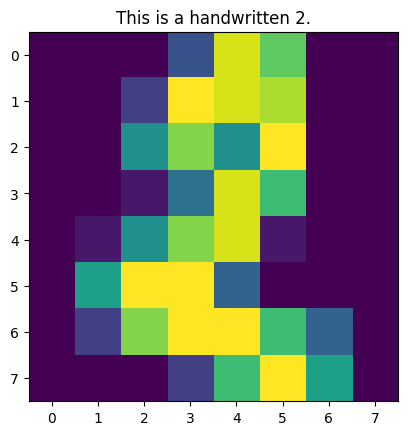

In [42]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

plt.imshow(digits[2].reshape(8, 8))
plt.title('This is a handwritten 2.');

### As we have seen in few examples now, this problem would have following steps to solve:

1. Normalize the Scalar features
2. Get X_train, X_test, y_train and y_test
3. Create the regression models Logitsic Regression, Decision Tree Classifier, KNN CLassifier and Support Vector Machine (SVM) Classifier
4. Create a Grid Search Cross Validation Object and pass the relevant paramaters
5. Fit the Grid Search and collect various stats, such as fit time, training accurracy, test accuracy, best fit etc  

In [43]:
# Normalize the Scalar features
from sklearn.preprocessing import StandardScaler

print (digits[0][:5])
digits = StandardScaler().fit_transform(digits)
print (digits[0][:5])

[ 0.  0.  5. 13.  9.]
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751]


In [44]:
# Get X_train, X_test, y_train and y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits, labels)

#### Create the regression models with Grid Search CV
3. Logitsic Regression, Decision Tree Classifier, KNN CLassifier and Simple Vector Machine (SVM) Classifier
4. Create a Grid Search Cross Validation Object and pass the relevant paramaters
5. Fit the Grid Search and collect various stats, such as fit time, training accurracy, test accuracy, best fit etc  

In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

from sklearn.metrics import accuracy_score

results = []

param_dict = {'C': [0.1, 1, 10]}

logistic_regression = LogisticRegression(max_iter=1000)
grid = GridSearchCV(estimator=logistic_regression, param_grid=param_dict)

start_time = time.time()
grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid.cv_results_['mean_fit_time'])
    

best_model = grid.best_estimator_
print (best_model)

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

results.append(["Logistic Regression", train_score, test_score, fit_time])

results

LogisticRegression(C=1, max_iter=1000)


[['Logistic Regression', 0.9985152190051967, 0.96, 0.4185933272043864]]

In [46]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

y_pred = ''
param_dict = {'max_depth': [5, 10, 15]}

decision_tree = DecisionTreeClassifier()

grid = GridSearchCV(estimator=decision_tree, param_grid=param_dict)
start_time = time.time()
    
grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid.cv_results_['mean_fit_time'])
    

best_model = grid.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

results.append(["Decision Tree Classifier", train_score, test_score, fit_time])

results

[['Logistic Regression', 0.9985152190051967, 0.96, 0.4185933272043864],
 ['Decision Tree Classifier', 1.0, 0.8488888888888889, 0.1842824618021647]]

In [47]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

param_dict = {'n_neighbors': [3, 5, 7]}
knn_classifier = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn_classifier, param_grid=param_dict)

start_time = time.time()
grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid.cv_results_['mean_fit_time'])
    
best_model = grid.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

results.append(["KNN Classifier", train_score, test_score, fit_time])

results

[['Logistic Regression', 0.9985152190051967, 0.96, 0.4185933272043864],
 ['Decision Tree Classifier', 1.0, 0.8488888888888889, 0.1842824618021647],
 ['KNN Classifier',
  0.9814402375649591,
  0.9622222222222222,
  0.055933475494384766]]

In [48]:
#SVM
from sklearn.svm import SVC


support_vector_classifier = SVC(kernel='linear', degree=2)
support_vector_classifier.fit(X_train, y_train)

param_dict = {'C': [0.1, 1, 10]}

grid = GridSearchCV(estimator=support_vector_classifier, param_grid=param_dict)

start_time = time.time()
grid.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid.cv_results_['mean_fit_time'])
    

best_model = grid.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

results.append(["Support Vector Classifier", train_score, test_score, fit_time])

In [49]:
results
results_df = pd.DataFrame(results, columns=['Name','Training Score','Test Score','Fit Time (Seconds)'])

results_df

,Name,Training Score,Test Score,Fit Time (Seconds)
0,Logistic Regression,0.998515,0.960000,0.418593
1,Decision Tree Classifier,1.000000,0.848889,0.184282
2,KNN Classifier,0.981440,0.962222,0.055933
3,Support Vector Classifier,1.000000,0.971111,0.276682
